In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# The first task

In [1]:
# Загрузил датасет transaction_data.csv. 
# Проверил размер таблицы, типы переменных, число пропущенных значений 
# и описательную статистику.

In [28]:
transaction = pd.read_csv('transaction_data.csv')

In [29]:
transaction.shape # Проверил размер таблицы

(5315, 3)

In [30]:
transaction.dtypes # Проверил типы переменных

date           object
name           object
transaction    object
dtype: object

In [31]:
transaction.isna().sum() # Проверил число пропущенных значений, 0

date           0
name           0
transaction    0
dtype: int64

In [32]:
transaction.describe() # Описательная статистика

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


# The second task

In [2]:
# Какие значения находятся в колонке transaction? 
# Сколько наблюдений относятся к тому или иному уровню? 
# Визуализировал результат с помощью барплота.

In [51]:
transaction.transaction.value_counts() # Узнал значения столбца transaction

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [52]:
transaction.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [41]:
transaction_info = transaction.transaction.value_counts()

<Axes: ylabel='transaction'>

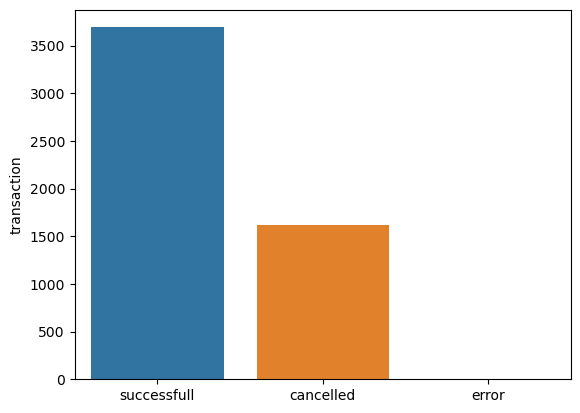

In [50]:
sns.barplot(x=transaction_info.index, y=transaction.transaction.value_counts())

In [ ]:
# С ошибкой совершилось 4 транзакции

# The third task

In [3]:
# Сколько успешных транзакций осуществил каждый из пользователей? 
# Построил гистограмму распределения числа успешных транзакций.

In [54]:
transaction.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [76]:
transaction_successfull =  transaction.query('transaction == "successfull"') # Здесь хронятся удачные сделки

In [85]:
users_transaction = transaction_successfull.groupby('name') \
                                           .agg({'transaction':'count'}) 

In [86]:
users_transaction.head(5) # Получил датафрейм с успешными опреациями пользователей

,transaction
name,
Ekaterina_Fedorova,72
Ekaterina_Ivanova,59
Ekaterina_Lesnova,63
Ekaterina_Ozerova,72
Ekaterina_Petrova,68


C:\Users\tema1337\AppData\Local\Temp\ipykernel_9752\2700520703.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users_transaction, kde=False)


<Axes: >

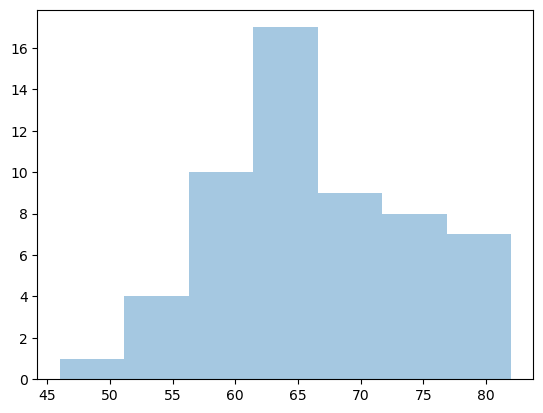

In [88]:
sns.distplot(users_transaction, kde=False)

# The fourth task

In [4]:
# Построил сводную таблицу user_vs_minute_pivot, 
# где в качестве столбцов были использованы имена пользователей, 
# строк – минуты, значений – число совершенных операций в указанную минуту. 
# Пропущенные значения заполнил нулями.

In [151]:
transaction_update = pd.read_csv('transaction_data_updated.csv')

In [152]:
transaction_update.head(3)

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6


In [153]:
transaction_number = transaction_update \
    .groupby(['name', 'minute'], as_index=False) \
    .agg({'transaction': 'count'}) \
    .rename(columns={'transaction':'transaction_number'})

In [154]:
transaction_number

,name,minute,transaction_number
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [156]:
users_vs_minute_pivot = transaction_number.pivot(index='minute', columns='name', values='transaction_number')

In [160]:
users_vs_minute_pivot.fillna(0, inplace=True)

In [161]:
users_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


# The fifth task

In [ ]:
# Изучил представленный график. 
# Если в данные закралась ошибка, исправьте её и сохраните правильное 
# число минут, прошедших с начала дня, в колонку true_minute.

<Axes: xlabel='minute'>

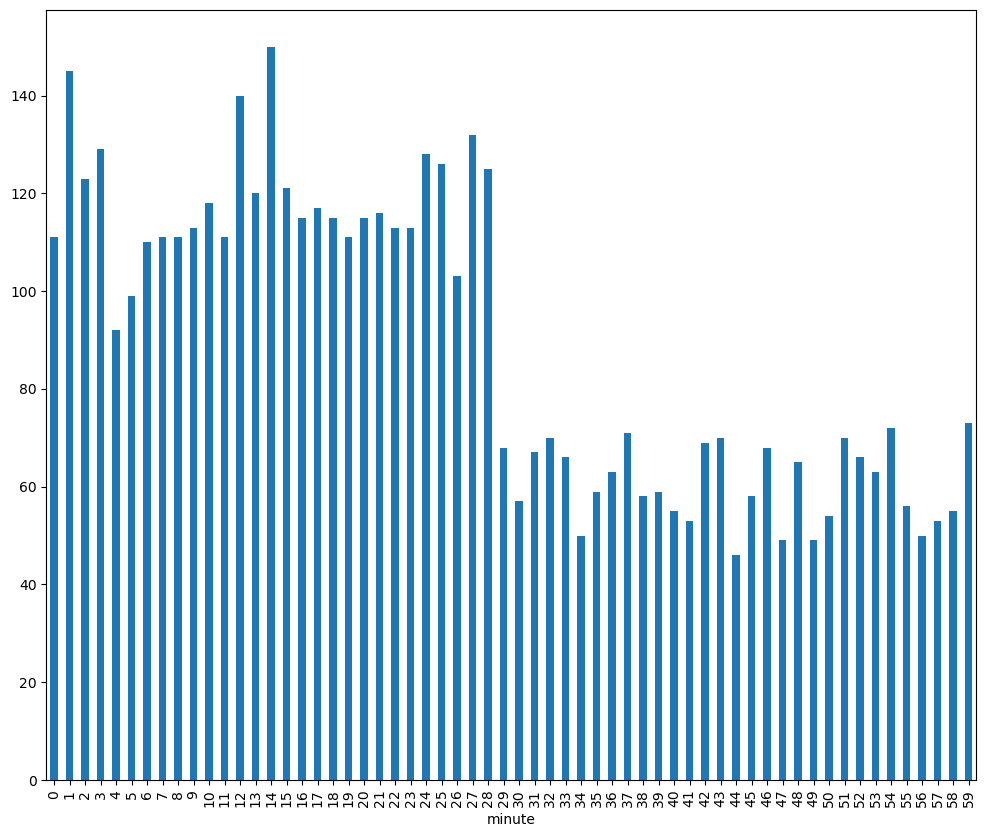

In [167]:
# График коллеги

users_vs_minute_pivot.sum(axis=1).plot.bar(figsize=(12, 10))

In [169]:
transaction_update.date.max()

'2020-03-02 01:29:05'

In [170]:
transaction_update.date.min()

'2020-03-02 00:00:00'

In [171]:
# Наш график не смиметричен. Ошибка заключалась в том, что мы собрали данные
# Только за 1.5 часа.